In [2]:
with open("benchmark_results.txt", "r") as f:
    data = f.read()
    
# print(data)

data = data.strip().split("\n\n")

print(data)

['Image: yaskam24/c:factors\nContainer ID: e3abe4c06b83c9516e5093f2b49c255eea7cf183278f8e0494204359d39b4146\nExit code: 0\nTotal execution time: 0.238151550 seconds\nUTC: 2025-08-25 18:14:13.853082+00:00, IST: 2025-08-25 23:44:13.853082+00:00\nContainer creations: 0.142032000 seconds\nLogs:\n25-08-2025 18:14:13.853082554\n1\n2\n4\n5\n8\n10\n20\n40\nTotal factors: 8', '\nImage: yaskam24/c:sine\nContainer ID: 713537daf4027791b2de569e0db1300621a077652f231a0145fc41def2367697\nExit code: 0\nTotal execution time: 0.284860373 seconds\nUTC: 2025-08-25 18:14:14.112014+00:00, IST: 2025-08-25 23:44:14.112014+00:00\nContainer creations: 0.161230000 seconds\nLogs:\n25-08-2025 18:14:14.112014817\nSine of 40.000000 radians is: 0.745113', '\nImage: yaskam24/c:cosine\nContainer ID: 78a50f3086072468d4f87fb4823f2c2816c4e07739b4b9eefd931b54f43e65c8\nExit code: 0\nTotal execution time: 0.250427008 seconds\nUTC: 2025-08-25 18:14:14.380463+00:00, IST: 2025-08-25 23:44:14.380463+00:00\nContainer creations: 0.

In [ ]:
import pandas as pd
import re
import glob

# List all files
files = sorted(glob.glob("/benchmarking_results/benchmark_results_*.txt"))

all_data = []

for trial_index, filename in enumerate(files, start=1):
    with open(filename, "r") as f:
        text = f.read()

    paragraphs = text.strip().split("\n\n")

    for para in paragraphs:
        image_match = re.search(r'Image:\s*(\S+)', para)
        if not image_match:
            continue
        image = image_match.group(1)

        # Determine base
        if "_alpine" in image:
            base = "alpine"
            image_clean = image.replace("_alpine", "")
        else:
            base = "slim"
            image_clean = image

        # Extract language and function
        lang_match = re.search(r'yaskam24/(\w+):(\w+)', image_clean)
        if lang_match:
            lang = lang_match.group(1)
            func = lang_match.group(2)
        else:
            lang = None
            func = None

        # Extract times
        creation_match = re.search(r'Container creations:\s*([\d.]+) seconds', para)
        exec_match = re.search(r'Total execution time:\s*([\d.]+) seconds', para)

        container_creation = float(creation_match.group(1)) if creation_match else None
        exec_time = float(exec_match.group(1)) if exec_match else None

        all_data.append({
            "Trial": f"trial{trial_index}",
            "Base": base,
            "Language": lang,
            "Function": func,
            "ContainerCreationTime": container_creation,
            "ExecutionTime": exec_time
        })

# Create DataFrame
df = pd.DataFrame(all_data)

# Pivot so slim/alpine are side by side
pivot_df = df.pivot_table(
    index=["Trial", "Language", "Function"],
    columns="Base",
    values=["ContainerCreationTime", "ExecutionTime"]
).reset_index()

# Flatten MultiIndex columns
pivot_df.columns = ['_'.join(col).strip('_') for col in pivot_df.columns]

print(pivot_df)


pivot_df.to_csv("benchmark_summary.csv", index=False)


      Trial Language   Function  ContainerCreationTime_alpine  \
0    trial1        c     cosine                      0.126584   
1    trial1        c  factorial                      0.136552   
2    trial1        c    factors                      0.135391   
3    trial1        c       sine                      0.116149   
4    trial1       go     cosine                      0.186127   
..      ...      ...        ...                           ...   
115  trial9       go       sine                      0.148704   
116  trial9     rust     cosine                      0.136876   
117  trial9     rust  factorial                      0.127045   
118  trial9     rust    factors                      0.148596   
119  trial9     rust       sine                      0.150884   

     ContainerCreationTime_slim  ExecutionTime_alpine  ExecutionTime_slim  
0                      0.150324              0.234692            0.266951  
1                      0.146883              0.237340            0.

40
40
[{'cosine': 0.150324}, {'factorial': 0.146883}, {'factors': 0.115595}, {'sine': 0.160865}, {'cosine': 0.136624}, {'factorial': 0.169739}, {'factors': 0.157457}, {'sine': 0.166376}, {'cosine': 0.122844}, {'factorial': 0.14445}, {'factors': 0.136622}, {'sine': 0.176134}, {'cosine': 0.1168}, {'factorial': 0.170221}, {'factors': 0.142774}, {'sine': 0.141487}, {'cosine': 0.194263}, {'factorial': 0.16851}, {'factors': 0.147602}, {'sine': 0.166933}, {'cosine': 0.157799}, {'factorial': 0.193916}, {'factors': 0.148958}, {'sine': 0.139313}, {'cosine': 0.175554}, {'factorial': 0.207325}, {'factors': 0.139222}, {'sine': 0.157486}, {'cosine': 0.161232}, {'factorial': 0.13161}, {'factors': 0.143485}, {'sine': 0.152016}, {'cosine': 0.13869}, {'factorial': 0.145012}, {'factors': 0.165185}, {'sine': 0.139521}, {'cosine': 0.180599}, {'factorial': 0.152321}, {'factors': 0.179517}, {'sine': 0.159948}]
[{'cosine': 0.126584}, {'factorial': 0.136552}, {'factors': 0.135391}, {'sine': 0.116149}, {'cosine

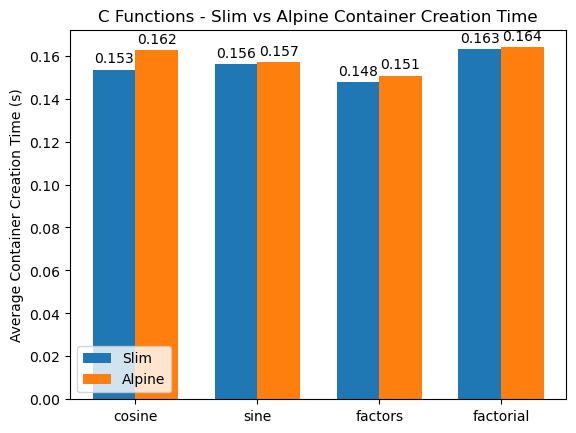

go
40
40
[{'cosine': 0.158079}, {'factorial': 0.132798}, {'factors': 0.123632}, {'sine': 0.161649}, {'cosine': 0.134669}, {'factorial': 0.135704}, {'factors': 0.153012}, {'sine': 0.185525}, {'cosine': 0.120474}, {'factorial': 0.171722}, {'factors': 0.159419}, {'sine': 0.126728}, {'cosine': 0.164667}, {'factorial': 0.195639}, {'factors': 0.149002}, {'sine': 0.14514}, {'cosine': 0.173308}, {'factorial': 0.211137}, {'factors': 0.209786}, {'sine': 0.202072}, {'cosine': 0.199703}, {'factorial': 0.168993}, {'factors': 0.212754}, {'sine': 0.208247}, {'cosine': 0.188779}, {'factorial': 0.236398}, {'factors': 0.182983}, {'sine': 0.205948}, {'cosine': 0.176259}, {'factorial': 0.148048}, {'factors': 0.161776}, {'sine': 0.158537}, {'cosine': 0.171907}, {'factorial': 0.151761}, {'factors': 0.156643}, {'sine': 0.189566}, {'cosine': 0.138755}, {'factorial': 0.148683}, {'factors': 0.143726}, {'sine': 0.155259}]
[{'cosine': 0.186127}, {'factorial': 0.165821}, {'factors': 0.1457}, {'sine': 0.171089}, {'

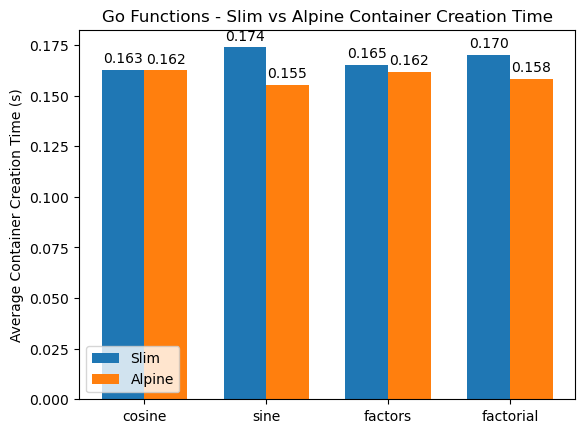

Rust
40
40
[{'cosine': 0.141409}, {'factorial': 0.12115}, {'factors': 0.132119}, {'sine': 0.158791}, {'cosine': 0.147147}, {'factorial': 0.164002}, {'factors': 0.123896}, {'sine': 0.137958}, {'cosine': 0.143071}, {'factorial': 0.157768}, {'factors': 0.149958}, {'sine': 0.183158}, {'cosine': 0.148961}, {'factorial': 0.146486}, {'factors': 0.202548}, {'sine': 0.191309}, {'cosine': 0.173301}, {'factorial': 0.207314}, {'factors': 0.189061}, {'sine': 0.204506}, {'cosine': 0.143255}, {'factorial': 0.15604}, {'factors': 0.119652}, {'sine': 0.1694}, {'cosine': 0.154344}, {'factorial': 0.147632}, {'factors': 0.167103}, {'sine': 0.172051}, {'cosine': 0.153764}, {'factorial': 0.169136}, {'factors': 0.163095}, {'sine': 0.136728}, {'cosine': 0.184919}, {'factorial': 0.137706}, {'factors': 0.13671}, {'sine': 0.151777}, {'cosine': 0.170984}, {'factorial': 0.165964}, {'factors': 0.150016}, {'sine': 0.153658}]
[{'cosine': 0.154972}, {'factorial': 0.141851}, {'factors': 0.148968}, {'sine': 0.158822}, {'

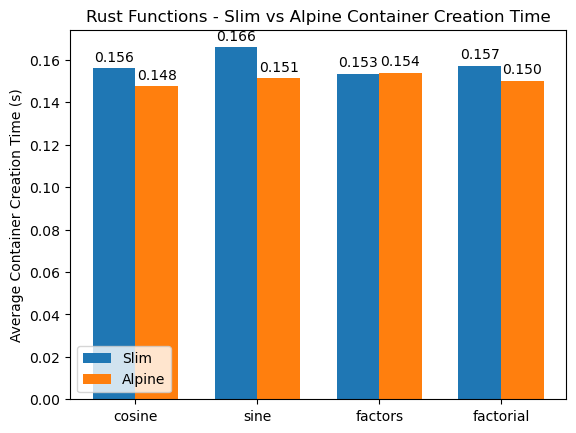

In [3]:
import matplotlib.pyplot as plt

df = pd.read_csv("benchmarking_results/benchmark_summary.csv")

creation_time_slim_c = []
creation_time_alpine_c = []

for index, row in df.iterrows():
    # check if the language for that index is c then
    if row['Language'] == 'c':
        creation_time_slim_c.append({f"{row['Function']}" : row['ContainerCreationTime_slim']})
        creation_time_alpine_c.append({f"{row['Function']}" : row['ContainerCreationTime_alpine']})
print(len(creation_time_slim_c))
print(len(creation_time_alpine_c))
print(creation_time_slim_c)
print(creation_time_alpine_c)

print("C")
functions = ['cosine', 'sine', 'factors', 'factorial']
avg_slim = []
avg_alpine = []

for func in functions:
    total_slim = 0
    total_alpine = 0
    l = 0
    for i in creation_time_slim_c:
        if func in i:
            total_slim += i[func]
            # l += 1
    for i in creation_time_alpine_c:
        if func in i:
            total_alpine += i[func]
            l += 1
    avg_creation_time_slim_c_func = total_slim / l
    print("function in slim container:", func, "avg creation time:", avg_creation_time_slim_c_func)
    avg_slim.append(avg_creation_time_slim_c_func)
    avg_creation_time_alpine_c_func = total_alpine / l
    print("function in alpine container:", func, "avg creation time:", avg_creation_time_alpine_c_func)
    avg_alpine.append(avg_creation_time_alpine_c_func)

x = range(len(functions))  # positions
bar_width = 0.35

rect1 = plt.bar([p - bar_width/2 for p in x], avg_slim, width=bar_width, label='Slim')
rect2 = plt.bar([p + bar_width/2 for p in x], avg_alpine, width=bar_width, label='Alpine')
plt.bar_label(rect1, padding=3, fmt="%.3f")
plt.bar_label(rect2, padding=3, fmt="%.3f")
plt.xticks(x, functions)
plt.ylabel("Average Container Creation Time (s)")
plt.title("C Functions - Slim vs Alpine Container Creation Time")
plt.legend()

plt.show()

print("go")


creation_time_slim_go = []
creation_time_alpine_go = []

for index, row in df.iterrows():
    # check if the language for that index is c then
    if row['Language'] == 'go':
        creation_time_slim_go.append({f"{row['Function']}" : row['ContainerCreationTime_slim']})
        creation_time_alpine_go.append({f"{row['Function']}" : row['ContainerCreationTime_alpine']})
print(len(creation_time_slim_go))
print(len(creation_time_alpine_go))
print(creation_time_slim_go)
print(creation_time_alpine_go)

functions = ['cosine', 'sine', 'factors', 'factorial']
avg_slim = []
avg_alpine = []

for func in functions:
    total_slim = 0
    total_alpine = 0
    l = 0
    for i in creation_time_slim_go:
        if func in i:
            total_slim += i[func]
            # l += 1
    for i in creation_time_alpine_go:
        if func in i:
            total_alpine += i[func]
            l += 1
    avg_creation_time_slim_go_func = total_slim / l
    avg_slim.append(avg_creation_time_slim_go_func)
    print("function in slim container:", func, "avg creation time:", avg_creation_time_slim_go_func)
    avg_creation_time_alpine_go_func = total_alpine / l
    avg_alpine.append(avg_creation_time_alpine_go_func) 
    print("function in alpine container:", func, "avg creation time:", avg_creation_time_alpine_go_func)

x = range(len(functions))  # positions
bar_width = 0.35

rect1 = plt.bar([p - bar_width/2 for p in x], avg_slim, width=bar_width, label='Slim')
rect2 =plt.bar([p + bar_width/2 for p in x], avg_alpine, width=bar_width, label='Alpine')
plt.bar_label(rect1, padding=3, fmt="%.3f")
plt.bar_label(rect2, padding=3, fmt="%.3f")
plt.xticks(x, functions)
plt.ylabel("Average Container Creation Time (s)")
plt.title("Go Functions - Slim vs Alpine Container Creation Time")
plt.legend()

plt.show()

print("Rust")

creation_time_slim_rust = []
creation_time_alpine_rust = []

for index, row in df.iterrows():
    # check if the language for that index is rust then
    if row['Language'] == 'rust':
        creation_time_slim_rust.append({f"{row['Function']}" : row['ContainerCreationTime_slim']})
        creation_time_alpine_rust.append({f"{row['Function']}" : row['ContainerCreationTime_alpine']})
print(len(creation_time_slim_rust))
print(len(creation_time_alpine_rust))
print(creation_time_slim_rust)
print(creation_time_alpine_rust)

avg_slim = []
avg_alpine = []

for func in ['cosine', 'sine', 'factors', 'factorial']:
    total_slim = 0
    total_alpine = 0
    l = 0
    for i in creation_time_slim_rust:
        if func in i:
            total_slim += i[func]
            # l += 1
    for i in creation_time_alpine_rust:
        if func in i:
            total_alpine += i[func]
            l += 1
    avg_creation_time_slim_rust_func = total_slim / l
    avg_slim.append(avg_creation_time_slim_rust_func)
    print("function in slim container:", func, "avg creation time:", avg_creation_time_slim_rust_func)
    avg_creation_time_alpine_rust_func = total_alpine / l
    avg_alpine.append(avg_creation_time_alpine_rust_func)
    print("function in alpine container:", func, "avg creation time:", avg_creation_time_alpine_rust_func)

x = range(len(functions))  # positions
bar_width = 0.35

rect1 = plt.bar([p - bar_width/2 for p in x], avg_slim, width=bar_width, label='Slim')
rect2 = plt.bar([p + bar_width/2 for p in x], avg_alpine, width=bar_width, label='Alpine')
plt.bar_label(rect1, padding=3, fmt="%.3f")
plt.bar_label(rect2, padding=3, fmt="%.3f")
plt.xticks(x, functions)
plt.ylabel("Average Container Creation Time (s)")
plt.title("Rust Functions - Slim vs Alpine Container Creation Time")
plt.legend()

plt.show()


40
40
[{'cosine': 0.266951084}, {'factorial': 0.247818708}, {'factors': 0.205028296}, {'sine': 0.271274328}, {'cosine': 0.238103628}, {'factorial': 0.281980515}, {'factors': 0.280585289}, {'sine': 0.279549837}, {'cosine': 0.210052013}, {'factorial': 0.23451376}, {'factors': 0.231303215}, {'sine': 0.280634403}, {'cosine': 0.212954283}, {'factorial': 0.297024727}, {'factors': 0.252696514}, {'sine': 0.247173548}, {'cosine': 0.307111502}, {'factorial': 0.26827383}, {'factors': 0.249690533}, {'sine': 0.272809982}, {'cosine': 0.248883486}, {'factorial': 0.313172817}, {'factors': 0.237758636}, {'sine': 0.231217861}, {'cosine': 0.272600889}, {'factorial': 0.316824675}, {'factors': 0.245868921}, {'sine': 0.24835515}, {'cosine': 0.286675692}, {'factorial': 0.234145641}, {'factors': 0.246034861}, {'sine': 0.265730619}, {'cosine': 0.237851858}, {'factorial': 0.247690678}, {'factors': 0.274329424}, {'sine': 0.235018969}, {'cosine': 0.297765493}, {'factorial': 0.246909142}, {'factors': 0.277778625},

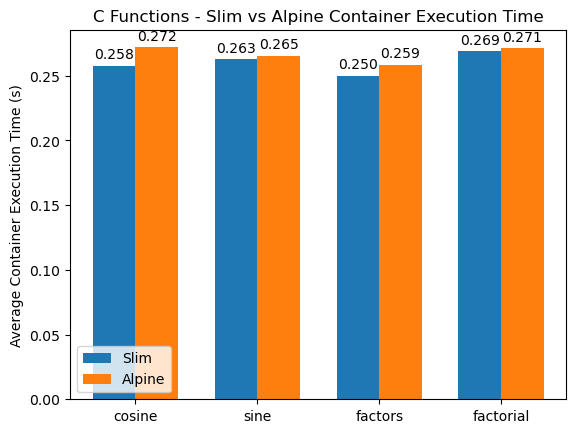

go
40
40
[{'cosine': 0.233293772}, {'factorial': 0.226688147}, {'factors': 0.222607374}, {'sine': 0.270690203}, {'cosine': 0.225481987}, {'factorial': 0.259796381}, {'factors': 0.277711868}, {'sine': 0.308602333}, {'cosine': 0.229627848}, {'factorial': 0.273932219}, {'factors': 0.248253107}, {'sine': 0.221746445}, {'cosine': 0.28231287}, {'factorial': 0.318184853}, {'factors': 0.244013309}, {'sine': 0.239868164}, {'cosine': 0.298022032}, {'factorial': 0.324276686}, {'factors': 0.342691422}, {'sine': 0.319968939}, {'cosine': 0.326110125}, {'factorial': 0.265278101}, {'factors': 0.326948643}, {'sine': 0.326882839}, {'cosine': 0.308291912}, {'factorial': 0.362627268}, {'factors': 0.299868345}, {'sine': 0.322227001}, {'cosine': 0.293859243}, {'factorial': 0.236877203}, {'factors': 0.271190166}, {'sine': 0.260920286}, {'cosine': 0.266241789}, {'factorial': 0.267208099}, {'factors': 0.268552303}, {'sine': 0.295781374}, {'cosine': 0.239236116}, {'factorial': 0.287851334}, {'factors': 0.259726

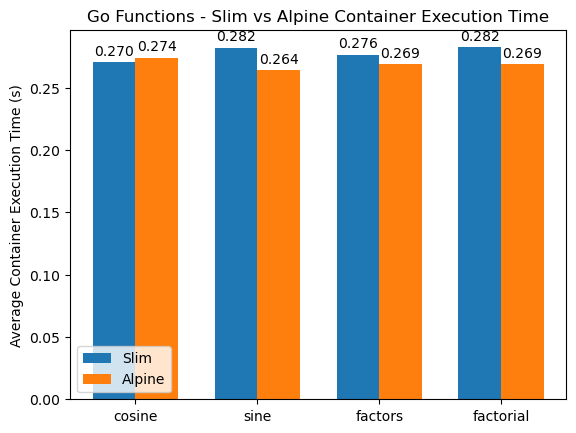

Rust
40
40
[{'cosine': 0.227043629}, {'factorial': 0.219815969}, {'factors': 0.233329535}, {'sine': 0.271277189}, {'cosine': 0.247086525}, {'factorial': 0.287772179}, {'factors': 0.232888937}, {'sine': 0.22955513}, {'cosine': 0.233747482}, {'factorial': 0.247192144}, {'factors': 0.262879372}, {'sine': 0.276560783}, {'cosine': 0.269414663}, {'factorial': 0.270858049}, {'factors': 0.327652216}, {'sine': 0.301947594}, {'cosine': 0.280273199}, {'factorial': 0.309973717}, {'factors': 0.305575848}, {'sine': 0.304274797}, {'cosine': 0.244201183}, {'factorial': 0.244886637}, {'factors': 0.220774174}, {'sine': 0.291474342}, {'cosine': 0.267393827}, {'factorial': 0.251725912}, {'factors': 0.276790857}, {'sine': 0.290894747}, {'cosine': 0.262044191}, {'factorial': 0.279322147}, {'factors': 0.274647951}, {'sine': 0.255809546}, {'cosine': 0.299328327}, {'factorial': 0.246500731}, {'factors': 0.244187832}, {'sine': 0.270654202}, {'cosine': 0.296283484}, {'factorial': 0.296258926}, {'factors': 0.2531

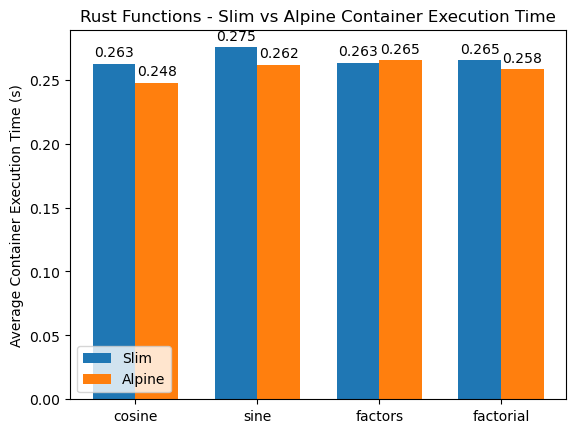

In [8]:
import matplotlib.pyplot as plt

df = pd.read_csv("benchmarking_results/benchmark_summary.csv")

execution_time_slim_c = []
execution_time_alpine_c = []

for index, row in df.iterrows():
    # check if the language for that index is c then
    if row['Language'] == 'c':
        execution_time_slim_c.append({f"{row['Function']}" : row['ExecutionTime_slim']})
        execution_time_alpine_c.append({f"{row['Function']}" : row['ExecutionTime_alpine']})
print(len(execution_time_slim_c))
print(len(execution_time_alpine_c))
print(execution_time_slim_c)
print(execution_time_alpine_c)

print("C")
functions = ['cosine', 'sine', 'factors', 'factorial']
avg_slim = []
avg_alpine = []

for func in functions:
    total_slim = 0
    total_alpine = 0
    l = 0
    for i in execution_time_slim_c:
        if func in i:
            total_slim += i[func]
            # l += 1
    for i in execution_time_alpine_c:
        if func in i:
            total_alpine += i[func]
            l += 1
    avg_execution_time_slim_c_func = total_slim / l
    print("function in slim container:", func, "avg execution time:", avg_execution_time_slim_c_func)
    avg_slim.append(avg_execution_time_slim_c_func)
    avg_execution_time_alpine_c_func = total_alpine / l
    print("function in alpine container:", func, "avg execution time:", avg_execution_time_alpine_c_func)
    avg_alpine.append(avg_execution_time_alpine_c_func)

x = range(len(functions))  # positions
bar_width = 0.35

rects1 = plt.bar([p - bar_width/2 for p in x], avg_slim, width=bar_width, label='Slim')
rects2 = plt.bar([p + bar_width/2 for p in x], avg_alpine, width=bar_width, label='Alpine')

plt.xticks(x, functions)
plt.ylabel("Average Container Execution Time (s)")
plt.title("C Functions - Slim vs Alpine Container Execution Time")
plt.legend()
plt.bar_label(rects1, padding=3, fmt="%.3f")
plt.bar_label(rects2, padding=3, fmt="%.3f")
plt.show()

print("go")


execution_time_slim_go = []
execution_time_alpine_go = []

for index, row in df.iterrows():
    # check if the language for that index is c then
    if row['Language'] == 'go':
        execution_time_slim_go.append({f"{row['Function']}" : row['ExecutionTime_slim']})
        execution_time_alpine_go.append({f"{row['Function']}" : row['ExecutionTime_alpine']})
print(len(execution_time_slim_go))
print(len(execution_time_alpine_go))
print(execution_time_slim_go)
print(execution_time_alpine_go)

functions = ['cosine', 'sine', 'factors', 'factorial']
avg_slim = []
avg_alpine = []

for func in functions:
    total_slim = 0
    total_alpine = 0
    l = 0
    for i in execution_time_slim_go:
        if func in i:
            total_slim += i[func]
            # l += 1
    for i in execution_time_alpine_go:
        if func in i:
            total_alpine += i[func]
            l += 1
    avg_execution_time_slim_go_func = total_slim / l
    avg_slim.append(avg_execution_time_slim_go_func)
    print("function in slim container:", func, "avg execution time:", avg_execution_time_slim_go_func)
    avg_execution_time_alpine_go_func = total_alpine / l
    avg_alpine.append(avg_execution_time_alpine_go_func)
    print("function in alpine container:", func, "avg execution time:", avg_execution_time_alpine_go_func)

x = range(len(functions))  # positions
bar_width = 0.35

rects1 = plt.bar([p - bar_width/2 for p in x], avg_slim, width=bar_width, label='Slim')
rects2 = plt.bar([p + bar_width/2 for p in x], avg_alpine, width=bar_width, label='Alpine')

plt.xticks(x, functions)
plt.ylabel("Average Container Execution Time (s)")
plt.title("Go Functions - Slim vs Alpine Container Execution Time")
plt.legend()
plt.bar_label(rects1, padding=3, fmt="%.3f")
plt.bar_label(rects2, padding=3, fmt="%.3f")
plt.show()

print("Rust")

execution_time_slim_rust = []
execution_time_alpine_rust = []

for index, row in df.iterrows():
    # check if the language for that index is rust then
    if row['Language'] == 'rust':
        execution_time_slim_rust.append({f"{row['Function']}" : row['ExecutionTime_slim']})
        execution_time_alpine_rust.append({f"{row['Function']}" : row['ExecutionTime_alpine']})
print(len(execution_time_slim_rust))
print(len(execution_time_alpine_rust))
print(execution_time_slim_rust)
print(execution_time_alpine_rust)

avg_slim = []
avg_alpine = []

for func in ['cosine', 'sine', 'factors', 'factorial']:
    total_slim = 0
    total_alpine = 0
    l = 0
    for i in execution_time_slim_rust:
        if func in i:
            total_slim += i[func]
            # l += 1
    for i in execution_time_alpine_rust:
        if func in i:
            total_alpine += i[func]
            l += 1
    avg_execution_time_slim_rust_func = total_slim / l
    avg_slim.append(avg_execution_time_slim_rust_func)
    print("function in slim container:", func, "avg execution time:", avg_execution_time_slim_rust_func)
    avg_execution_time_alpine_rust_func = total_alpine / l
    avg_alpine.append(avg_execution_time_alpine_rust_func)
    print("function in alpine container:", func, "avg execution time:", avg_execution_time_alpine_rust_func)

x = range(len(functions))  # positions
bar_width = 0.35

rects1 = plt.bar([p - bar_width/2 for p in x], avg_slim, width=bar_width, label='Slim')
rects2 = plt.bar([p + bar_width/2 for p in x], avg_alpine, width=bar_width, label='Alpine')
plt.xticks(x, functions)
plt.ylabel("Average Container Execution Time (s)")
plt.title("Rust Functions - Slim vs Alpine Container Execution Time")
plt.bar_label(rects1, padding=3, fmt="%.3f")
plt.bar_label(rects2, padding=3, fmt="%.3f")
plt.legend()

plt.show()

In [6]:
import subprocess
import time

paths = [
    "/home/yash/test/benchmark/Math/go/cosine/cosine.wasm",
    "/home/yash/test/benchmark/Math/go/sine/sine.wasm",
    "/home/yash/test/benchmark/Math/go/factors/factors.wasm",
    "/home/yash/test/benchmark/Math/go/factorial/factorial.wasm",
    "/home/yash/test/benchmark/Math/c/cosine/cosine.wasm",
    "/home/yash/test/benchmark/Math/c/sine/sine.wasm",
    "/home/yash/test/benchmark/Math/c/factors/factors.wasm",
    "/home/yash/test/benchmark/Math/c/factorial/factorial.wasm",
    "/home/yash/test/benchmark/Math/rust/cosine/target/wasm32-wasip1/release/cosine.wasm",
    "/home/yash/test/benchmark/Math/rust/sine/target/wasm32-wasip1/release/sine.wasm",
    "/home/yash/test/benchmark/Math/rust/factors/target/wasm32-wasip1/release/factors.wasm",
    "/home/yash/test/benchmark/Math/rust/factorial/target/wasm32-wasip1/release/factorial.wasm"
]


trails = []
for i in range(1, 11):
    trail = []
    for i in paths:
        start_time = time.time()
        subprocess.run(["wasmedge", i, "40"])
        end_time = time.time()
        trail.append(f"For the {i} took {end_time - start_time} seconds")
    trails.append(trail)
print(trails)

print("c")
for trial in trails:
    


SyntaxError: incomplete input (1311261801.py, line 33)

Results saved to wasmedge_benchmarks.csv

Average Execution Times:
   Language   Function  ExecutionTime
0         c     cosine       0.016277
1         c  factorial       0.016884
2         c    factors       0.017663
3         c       sine       0.014853
4        go     cosine       0.023493
5        go  factorial       0.015356
6        go    factors       0.016432
7        go       sine       0.016923
8      rust     cosine       0.020660
9      rust  factorial       0.018809
10     rust    factors       0.017459
11     rust       sine       0.020010


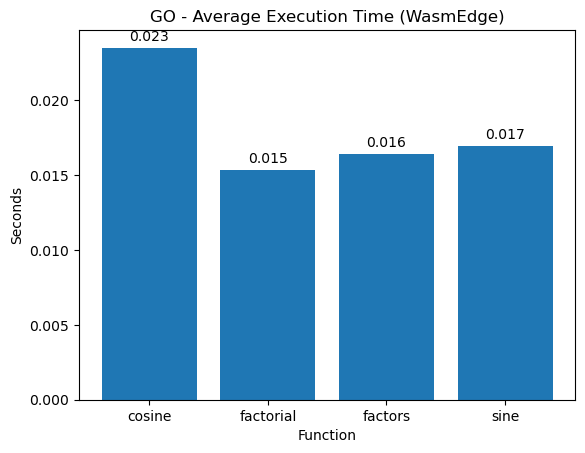

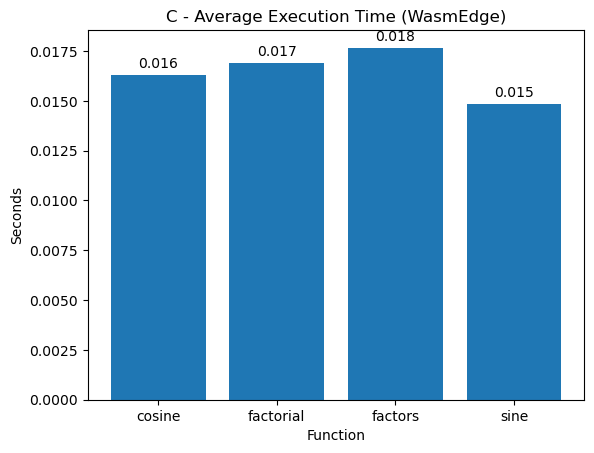

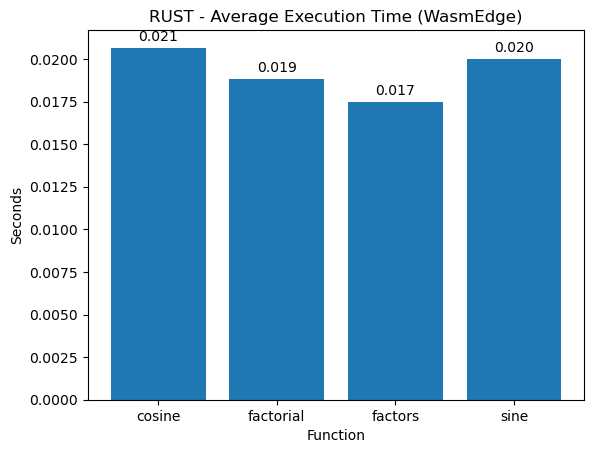

In [11]:
import subprocess
import time
import pandas as pd
import os

paths = [
    "/home/yash/test/benchmark/Math/go/cosine/cosine.wasm",
    "/home/yash/test/benchmark/Math/go/sine/sine.wasm",
    "/home/yash/test/benchmark/Math/go/factors/factors.wasm",
    "/home/yash/test/benchmark/Math/go/factorial/factorial.wasm",
    "/home/yash/test/benchmark/Math/c/cosine/cosine.wasm",
    "/home/yash/test/benchmark/Math/c/sine/sine.wasm",
    "/home/yash/test/benchmark/Math/c/factors/factors.wasm",
    "/home/yash/test/benchmark/Math/c/factorial/factorial.wasm",
    "/home/yash/test/benchmark/Math/rust/cosine/target/wasm32-wasip1/release/cosine.wasm",
    "/home/yash/test/benchmark/Math/rust/sine/target/wasm32-wasip1/release/sine.wasm",
    "/home/yash/test/benchmark/Math/rust/factors/target/wasm32-wasip1/release/factors.wasm",
    "/home/yash/test/benchmark/Math/rust/factorial/target/wasm32-wasip1/release/factorial.wasm"
]

# --- Collect results ---
all_data = []

for trial in range(1, 11):  # 10 trials
    for path in paths:
        lang = path.split("/")[6]  # go / c / rust
        func = os.path.basename(path).split(".")[0]  # cosine, sine, etc.

        start_time = time.time()
        subprocess.run(["wasmedge", path, "40"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        end_time = time.time()

        elapsed = end_time - start_time

        all_data.append({
            "Trial": trial,
            "Language": lang,
            "Function": func,
            "ExecutionTime": elapsed
        })

# --- Save to CSV ---
df = pd.DataFrame(all_data)
df.to_csv("wasmedge_benchmarks.csv", index=False)
print("Results saved to wasmedge_benchmarks.csv")

# --- Inference: Compute averages ---
avg_df = df.groupby(["Language", "Function"])["ExecutionTime"].mean().reset_index()
print("\nAverage Execution Times:")
print(avg_df)

# --- Optional: Plot ---
import matplotlib.pyplot as plt

for lang in df["Language"].unique():
    subset = avg_df[avg_df["Language"] == lang]
    ax1 = plt.bar(subset["Function"], subset["ExecutionTime"])
    plt.title(f"{lang.upper()} - Average Execution Time (WasmEdge)")
    plt.ylabel("Seconds")
    plt.xlabel("Function")
    plt.bar_label(ax1, padding=3, fmt="%.3f")
    plt.show()


Results saved to direct_benchmark.csv

Average Execution Times:
  Language   Function  ExecutionTime
0        c     cosine       0.002516
1        c  factorial       0.002421
2        c    factors       0.002329
3        c       sine       0.002654
4       go     cosine       0.003576
5       go  factorial       0.003672
6       go    factors       0.003466
7       go       sine       0.003674


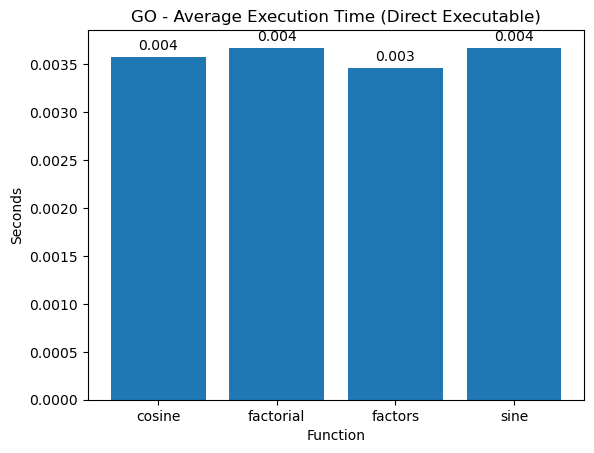

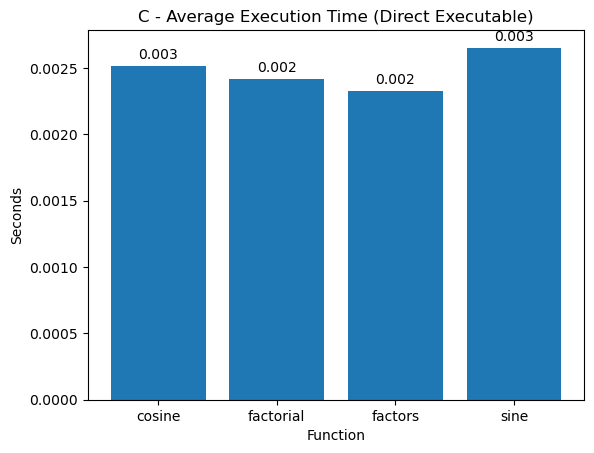

In [2]:
import subprocess
import time
import pandas as pd
import os

paths = [
    "/home/yash/test/benchmark/Math/go/cosine/cosine",
    "/home/yash/test/benchmark/Math/go/sine/sine",
    "/home/yash/test/benchmark/Math/go/factors/factors",
    "/home/yash/test/benchmark/Math/go/factorial/factorial",
    "/home/yash/test/benchmark/Math/c/cosine/cosine",
    "/home/yash/test/benchmark/Math/c/sine/sine",
    "/home/yash/test/benchmark/Math/c/factors/factors",
    "/home/yash/test/benchmark/Math/c/factorial/factorial",
]

# --- Collect results ---
all_data = []

for trial in range(1, 11):  # 10 trials
    for path in paths:
        lang = path.split("/")[6]  # go / c / rust
        func = os.path.basename(path).split(".")[0]  # cosine, sine, etc.

        start_time = time.time()
        subprocess.run([path, "40"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        end_time = time.time()

        elapsed = end_time - start_time

        all_data.append({
            "Trial": trial,
            "Language": lang,
            "Function": func,
            "ExecutionTime": elapsed
        })

# --- Save to CSV ---
df = pd.DataFrame(all_data)
df.to_csv("direct_benchmark.csv", index=False)
print("Results saved to direct_benchmark.csv")

# --- Inference: Compute averages ---
avg_df = df.groupby(["Language", "Function"])["ExecutionTime"].mean().reset_index()
print("\nAverage Execution Times:")
print(avg_df)

# --- Optional: Plot ---
import matplotlib.pyplot as plt

for lang in df["Language"].unique():
    subset = avg_df[avg_df["Language"] == lang]
    ax1 = plt.bar(subset["Function"], subset["ExecutionTime"])
    plt.title(f"{lang.upper()} - Average Execution Time (Direct Executable)")
    plt.ylabel("Seconds")
    plt.xlabel("Function")
    plt.bar_label(ax1, padding=3, fmt="%.3f")
    plt.show()


Results saved to direct_benchmark.csv

Average Execution Times:
  Language   Function  ExecutionTime
0        c     cosine       0.116326
1        c  factorial       0.105508
2        c    factors       0.046391
3        c       sine       0.108597
4       go     cosine       0.008805
5       go  factorial       0.013561
6       go    factors       0.012748
7       go       sine       0.010878


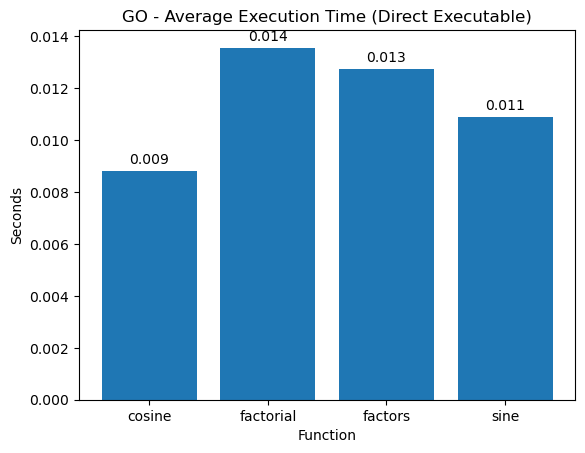

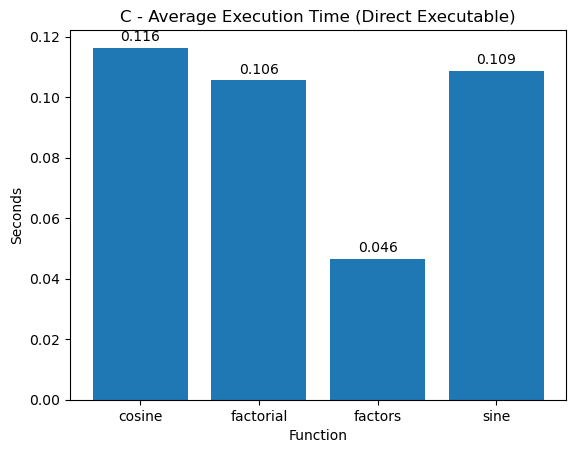

In [ ]:
import subprocess
import time
import pandas as pd
import os

paths = [
    "/home/yash/test/benchmark/Math/go/cosine/main.go",
    "/home/yash/test/benchmark/Math/go/sine/main.go",
    "/home/yash/test/benchmark/Math/go/factors/main.go",
    "/home/yash/test/benchmark/Math/go/factorial/main.go",
    "/home/yash/test/benchmark/Math/c/cosine/cosine.cpp",
    "/home/yash/test/benchmark/Math/c/sine/sine.cpp",
    "/home/yash/test/benchmark/Math/c/factors/factors.cpp",
    "/home/yash/test/benchmark/Math/c/factorial/factorial.cpp",
]

# --- Collect results ---
all_data = []

for trial in range(1, 11):  # 10 trials
    for path in paths:
        lang = path.split("/")[6]  # go / c / rust
        func = os.path.basename(path).split(".")[0]  # cosine, sine, etc.
        start_time = time.time()
        if lang == "go":
            func = path.split("/")[7]
        if lang == "c":
            # Compile the C code to an executable
            exe_path = path.replace(".cpp", "")
            subprocess.run(["g++", path, "-o", exe_path])
            path = exe_path
            subprocess.run([path, "40"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        if lang == "go":
            # Run the Go code directly using 'go run'
            subprocess.run(["go", "mod", "init", f"{func}", "-C", f"{os.path.dirname(path)}"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
            subprocess.run(["go", "build", "-o", f"{func}", "-C", f"{os.path.dirname(path)}"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
            subprocess.run([f"{os.path.dirname(path)}/{func}", "40"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)

        end_time = time.time()
        elapsed = end_time - start_time

        all_data.append({
            "Trial": trial,
            "Language": lang,
            "Function": func,
            "ExecutionTime": elapsed
        })

# --- Save to CSV ---
df = pd.DataFrame(all_data)
df.to_csv("direct_benchmark.csv", index=False)
print("Results saved to direct_benchmark.csv")

# --- Inference: Compute averages ---
avg_df = df.groupby(["Language", "Function"])["ExecutionTime"].mean().reset_index()
print("\nAverage Execution Times:")
print(avg_df)

# --- Optional: Plot ---
import matplotlib.pyplot as plt

for lang in df["Language"].unique():
    subset = avg_df[avg_df["Language"] == lang]
    ax1 = plt.bar(subset["Function"], subset["ExecutionTime"], color='blue')
    plt.title(f"{lang.upper()} - Average Execution Time (Direct Executable)")
    plt.ylabel("Seconds")
    plt.xlabel("Function")
    plt.bar_label(ax1, padding=3, fmt="%.3f")
    plt.show()


In [ ]:
print(execution_time_alpine_c)
print(execution_time_alpine_go)
print(execution_time_alpine_rust) 

print(avg_df)

# order followed is cosine, sine, factors, factorial
x_c = [0.271996, 0.265342, 0.258527, 0.271181]
x_go = [0.2737348319, 0.263773799, 0.26880147460000003, 0.2687481402]
x_rust = [0.2478129625, 0.26157519809999996, 0.2651181699, 0.2584235429] 




[{'cosine': 0.23469162}, {'factorial': 0.237339973}, {'factors': 0.230988741}, {'sine': 0.221364021}, {'cosine': 0.265950918}, {'factorial': 0.282797575}, {'factors': 0.282786131}, {'sine': 0.251297951}, {'cosine': 0.259124517}, {'factorial': 0.239361763}, {'factors': 0.255516052}, {'sine': 0.262145281}, {'cosine': 0.306369066}, {'factorial': 0.29989481}, {'factors': 0.321476221}, {'sine': 0.336846828}, {'cosine': 0.307373762}, {'factorial': 0.288254023}, {'factors': 0.283531189}, {'sine': 0.296869755}, {'cosine': 0.299019814}, {'factorial': 0.299902439}, {'factors': 0.254733801}, {'sine': 0.273898363}, {'cosine': 0.246656656}, {'factorial': 0.276064873}, {'factors': 0.2436378}, {'sine': 0.270534754}, {'cosine': 0.278561831}, {'factorial': 0.262722015}, {'factors': 0.235518456}, {'sine': 0.242561817}, {'cosine': 0.237039328}, {'factorial': 0.232164621}, {'factors': 0.237199306}, {'sine': 0.244748592}, {'cosine': 0.28517437}, {'factorial': 0.293303967}, {'factors': 0.239883423}, {'sine'

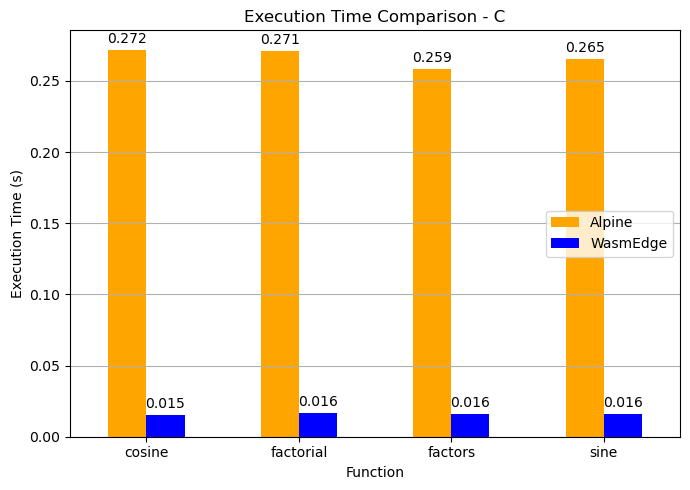

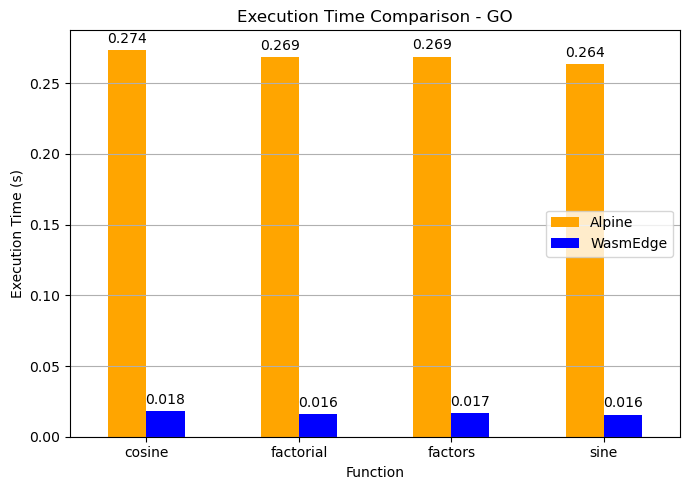

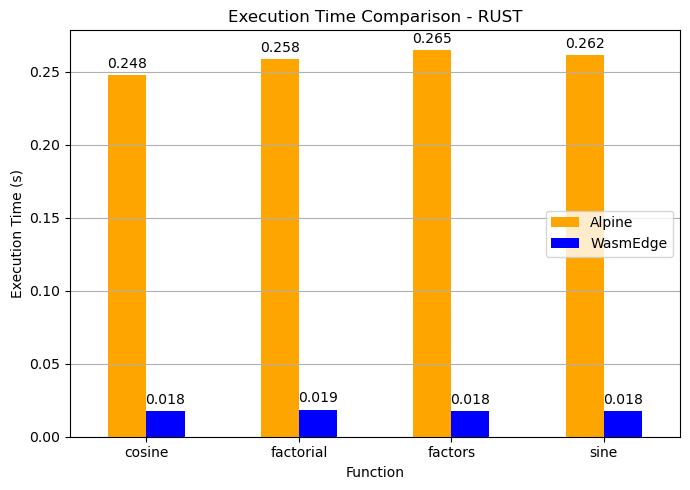

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# First dataset: WasmEdge execution times
data_wasmedge = {
    "Language": ["c", "c", "c", "c", "go", "go", "go", "go", "rust", "rust", "rust", "rust"],
    "Function": ["cosine", "factorial", "factors", "sine",
                 "cosine", "factorial", "factors", "sine",
                 "cosine", "factorial", "factors", "sine"],
    "ExecutionTime": [0.015198, 0.016383, 0.015678, 0.015857,
                      0.018069, 0.015851, 0.016844, 0.015697,
                      0.017654, 0.018615, 0.017685, 0.017529]
}
df_wasmedge = pd.DataFrame(data_wasmedge)
df_wasmedge["Env"] = "WasmEdge"

# Second dataset: Alpine execution times (order: cosine, sine, factors, factorial)
x_c = [0.271996, 0.271181, 0.258527, 0.265342]  # Reordered to match Function sequence
x_go = [0.2737348319, 0.2687481402, 0.2688014746, 0.263773799]
x_rust = [0.2478129625, 0.2584235429, 0.2651181699, 0.2615751981]

data_alpine = {
    "Language": ["c", "c", "c", "c",
                 "go", "go", "go", "go",
                 "rust", "rust", "rust", "rust"],
    "Function": ["cosine", "factorial", "factors", "sine",
                 "cosine", "factorial", "factors", "sine",
                 "cosine", "factorial", "factors", "sine"],
    "ExecutionTime": x_c + x_go + x_rust
}
df_alpine = pd.DataFrame(data_alpine)
df_alpine["Env"] = "Alpine"

# Combine both datasets
df_all = pd.concat([df_wasmedge, df_alpine], ignore_index=True)

# Plot for each language separately

# Plot bar graphs with consistent colors (Alpine = blue, WasmEdge = orange)

colors = {"Alpine": "orange", "WasmEdge": "blue"}

languages = df_all["Language"].unique()
# for lang in languages:
#     df_lang = df_all[df_all["Language"] == lang]
#     pivot_df = df_lang.pivot(index="Function", columns="Env", values="ExecutionTime")
    
#     pivot_df.plot(kind="bar", figsize=(7, 5), color=[colors[col] for col in pivot_df.columns])
#     plt.title(f"Execution Time Comparison - {lang.upper()}")
#     plt.ylabel("Execution Time (s)")
#     plt.xlabel("Function")
#     plt.grid(axis="y")
#     plt.xticks(rotation=0)
#     plt.bar_label(, padding=3, fmt="%.3f")
#     plt.bar_label(, padding=3, fmt="%.3f")
#     plt.show()

for lang in languages:
    df_lang = df_all[df_all["Language"] == lang]
    pivot_df = df_lang.pivot(index="Function", columns="Env", values="ExecutionTime")
    
    ax = pivot_df.plot(
        kind="bar", figsize=(7, 5),
        color=[colors[col] for col in pivot_df.columns]
    )
    ax.set_title(f"Execution Time Comparison - {lang.upper()}")
    ax.set_ylabel("Execution Time (s)")
    ax.set_xlabel("Function")
    ax.grid(axis="y")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.legend(loc='right')

    # Add labels above each bar
    for container in ax.containers:
        ax.bar_label(container, padding=3, fmt="%.3f")

    plt.tight_layout()
    plt.show()



In [6]:
import os

for root, dirs, files in os.walk("."):
    print("Directory:", root)
    for f in files:
        print("  File:", f)

Directory: .
  File: exectuor.wasm
  File: fact.py
  File: compilation.txt
  File: fact.wasm
  File: inference.ipynb
  File: Dockerfile
  File: benchamrk_wasm.ipynb
  File: ds.tar.gz
  File: executor.py
Directory: ./wasmedge
  File: env
Directory: ./wasmedge/bin
  File: wasmedge
  File: wasmedgec
Directory: ./wasmedge/include
Directory: ./wasmedge/include/wasmedge
  File: int128.h
  File: enum_types.h
  File: enum.inc
  File: wasmedge.h
  File: version.h
  File: enum_errcode.h
  File: enum_configure.h
Directory: ./wasmedge/plugin
Directory: ./wasmedge/lib
  File: libwasmedge.so.0.1.0
  File: libwasmedge.so
  File: libwasmedge.so.0
Directory: ./benchmark
Directory: ./benchmark/Math
Directory: ./benchmark/Math/rust
Directory: ./benchmark/Math/rust/sine
  File: Cargo.toml
  File: Cargo.lock
  File: Dockerfile
  File: Dockerfile.alpine
Directory: ./benchmark/Math/rust/sine/src
  File: main.rs
Directory: ./benchmark/Math/rust/sine/target
  File: CACHEDIR.TAG
  File: .rustc_info.json
Directo

In [9]:
import glob

print(glob.glob("benchmarking_results/benchmark_results_*.txt"))  # all .txt files in /benchmarking_results

for filename in glob.glob("benchmarking_results/benchmark_results_*.txt"):
    print("Processing file:", filename)


['benchmarking_results/benchmark_results_7.txt', 'benchmarking_results/benchmark_results_8.txt', 'benchmarking_results/benchmark_results_10.txt', 'benchmarking_results/benchmark_results_4.txt', 'benchmarking_results/benchmark_results_5.txt', 'benchmarking_results/benchmark_results_2.txt', 'benchmarking_results/benchmark_results_3.txt', 'benchmarking_results/benchmark_results_9.txt', 'benchmarking_results/benchmark_results_6.txt', 'benchmarking_results/benchmark_results_1.txt']
Processing file: benchmarking_results/benchmark_results_7.txt
Processing file: benchmarking_results/benchmark_results_8.txt
Processing file: benchmarking_results/benchmark_results_10.txt
Processing file: benchmarking_results/benchmark_results_4.txt
Processing file: benchmarking_results/benchmark_results_5.txt
Processing file: benchmarking_results/benchmark_results_2.txt
Processing file: benchmarking_results/benchmark_results_3.txt
Processing file: benchmarking_results/benchmark_results_9.txt
Processing file: benc

In [ ]:
import os
import subprocess

list = ["/home/yash/test/benchmark/Math/python/cosine/cosine.py", "/home/yash/test/benchmark/Math/python/sine/sine.py", "/home/yash/test/benchmark/Math/python/factorial/factorial.py", "/home/yash/test/benchmark/Math/python/factors/factors.py"]

for script in list:
    output_path = script.replace(".py", ".wasm")
    result = subprocess.run(["py2wasm", script, "-o", output_path])
    print(result)



In [ ]:
list = ["/home/yash/test/benchmark/Math/python/cosine/cosine.py", "/home/yash/test/benchmark/Math/python/sine/sine.py", "/home/yash/test/benchmark/Math/python/factorial/factorial.py", "/home/yash/test/benchmark/Math/python/factors/factors.py"]

# making docker file that puts the file in the / directory in alpine base image

for script in list:
    text = f"""
FROM python:3.10-alpine3.14
WORKDIR /
COPY {script.split("/")[-1]} /{script.split("/")[-1]}
CMD ["python3", "./{script.split("/")[-1]}", "40"]
"""
    base_path = script.split("/")
    base_path.pop()
    base_path = "/".join(base_path)
    print(text)
    with open(f"{base_path}/Dockerfile.alpine", "w") as f:
        f.write(text)

    print(f"Generated Dockerfile for {script}")
    # building the dockerfile
    result = subprocess.run(["docker", "build", "-t", f"yaskam24/python_alpine:{script.split('/')[-1].replace('.py', '')}", "-f", f"{base_path}/Dockerfile.alpine", base_path])
    print(result)

In [ ]:
import time
from datetime import datetime

# Benchmarking the python

list = ["/home/yash/test/benchmark/Math/python/cosine/cosine.py", "/home/yash/test/benchmark/Math/python/sine/sine.py", "/home/yash/test/benchmark/Math/python/factorial/factorial.py", "/home/yash/test/benchmark/Math/python/factors/factors.py"]

avg_time_execution_python = []

for j in list:
    base_path = j.replace("py", "wasm")
    avg = 0
    for i in range(1, 11):
        start_time = time.time_ns()
        result = subprocess.run(["wasmedge", base_path, "40"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        """
        fetch the time from here
        2025-09-02 05:03:40.000051385567
        25852016738884976640000
        """
        end_time = time.time_ns()
        execution_time = (end_time - start_time)/ 1e9
        avg += execution_time
    avg_time_execution_python.append({f"{base_path.split('/')[-1].replace('.wasm', '')}" : avg / 10})
print(avg_time_execution_python)


[{'cosine': 0.013142908200000001}, {'sine': 0.014427632}, {'factorial': 0.0144465546}, {'factors': 0.016252878300000002}]


In [ ]:
# benchmarking for the alpine image

docker_images = ["yaskam24/python_alpine:cosine", "yaskam24/python_alpine:sine", "yaskam24/python_alpine:factorial", "yaskam24/python_alpine:factors"]

avg_container_creation_python_alpine = []
avg_execution_python_alpine = []

for image in docker_images:
    container_creation_python_alpine = 0
    execution_python_alpine = 0
    for i in range(1, 11):
        start_time = time.time_ns()
        result = subprocess.run(["docker", "run", "--rm", image], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        end_time = time.time_ns()
        """
        fetch the time from here
        2025-09-02 05:03:40.000051385567
        25852016738884976640000
        """
        print(result)
        output_str = result.stdout.decode("utf-8").strip()
        lines = output_str.split("\n")
        start_container = int(lines[0].strip())

        container_creation_python_alpine += (start_container - start_time) / 1e9
        execution_python_alpine += (end_time - start_time) / 1e9
    avg_container_creation_python_alpine.append({f"{image.split(':')[-1]}" : container_creation_python_alpine / 10})
    avg_execution_python_alpine.append({f"{image.split(':')[-1]}" : execution_python_alpine / 10})


In [47]:
print(avg_container_creation_python_alpine)
print(avg_execution_python_alpine) 
with open("benchmarking_results/python_benchmarking.txt", "w") as f:
    f.write("Average Container Creation Time (Python Alpine):\n")
    for item in avg_container_creation_python_alpine:
        f.write(f"{item}\n")
    f.write("\nAverage Execution Time (Python Alpine):\n")
    for item in avg_execution_python_alpine:
        f.write(f"{item}\n")

[{'cosine': 0.3376093383}, {'sine': 0.34229427349999997}, {'factorial': 0.32910656380000003}, {'factors': 0.3383795642}]
[{'cosine': 0.46355721980000003}, {'sine': 0.46222414}, {'factorial': 0.4508116631}, {'factors': 0.45667954480000006}]


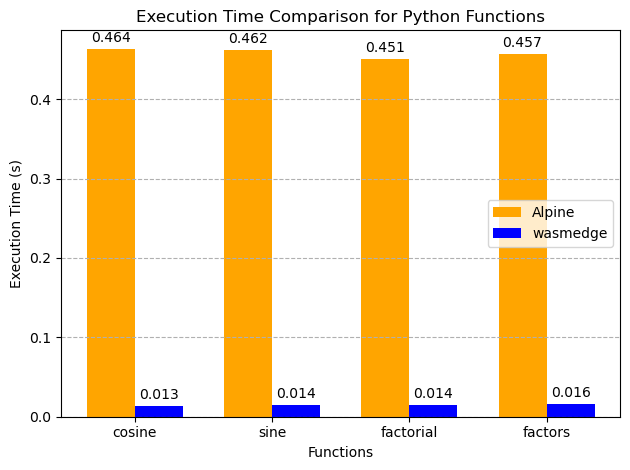

In [1]:
import matplotlib.pyplot as plt
import numpy as np

labels = ["cosine", "sine", "factorial", "factors"]
container_execution = [0.46355721980000003, 0.46222414, 0.4508116631, 0.45667954480000006]
wasmedge_execution = [0.013142908200000001, 0.014427632, 0.0144465546, 0.016252878300000002]

x = np.arange(len(labels))  # the label locations
width = 0.35  # width of the bars

colors = {"Alpine": "orange", "WasmEdge": "blue"}

# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, container_execution, width, label="Alpine", color = "orange")
# rects2 = ax.bar(x + width/2, wasmedge_execution, width, label="wasmedge", color = "blue")

# # Add labels, title, and legend
# ax.minorticks_on() 
# ax.set_xlabel("Functions")
# ax.set_ylabel("Execution Time (s)")
# ax.set_title("Execution Time Comparison")
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
# ax.bar_label(rects1, padding=3, fmt="%.3f")
# ax.bar_label(rects2, padding=3, fmt="%.3f")
# # ax.set_yscale("log")

plt.bar(x-width/2, container_execution, width, label="Alpine", color = "orange")
plt.bar(x+width/2, wasmedge_execution, width, label="wasmedge", color = "blue")
plt.xlabel("Functions")
plt.ylabel("Execution Time (s)")
plt.title("Execution Time Comparison for Python Functions")
plt.xticks(x, labels)
plt.legend(loc="right")
plt.bar_label(plt.bar(x - width/2, container_execution, width, label="Alpine", color = "orange"), padding=3, fmt="%.3f")
plt.bar_label(plt.bar(x + width/2, wasmedge_execution, width, label="wasmedge", color = "blue"), padding=3, fmt="%.3f")

# Show grid
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=1)
# plt.grid(axis="x", linestyle="--", alpha=1)

plt.show()

In [5]:
# list_images = ["yaskam24/python_alpine:factorial", "yaskam24/python_alpine:cosine", "yaskam24/python_alpine:sine", "yaskam24/python_alpine:factors", "yaskam24/c_alpine:factorial", "yaskam24/c_alpine:cosine", "yaskam24/c_alpine:sine", "yaskam24/c_alpine:factors", "yaskam24/rust_alpine:factorial", "yaskam24/rust_alpine:cosine", "yaskam24/rust_alpine:sine", "yaskam24/rust_alpine:factors"]
import time
import subprocess


rust_executable = ["/home/yash/test/benchmark/Math/rust/cosine/target/x86_64-unknown-linux-gnu/release/cosine", "/home/yash/test/benchmark/Math/rust/sine/target/x86_64-unknown-linux-gnu/release/sine", "/home/yash/test/benchmark/Math/rust/factors/target/x86_64-unknown-linux-gnu/release/factors", "/home/yash/test/benchmark/Math/rust/factorial/target/x86_64-unknown-linux-gnu/release/factorial"]

avg_rust_executable = []

for i in rust_executable:
    avg_time = 0
    for j in range(1, 11):
        start_time = time.time_ns()
        result = subprocess.run([i, "40"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        end_time = time.time_ns()
        avg_time += (end_time - start_time) /1e9
        print(result)

    avg_rust_executable.append({f"{i.split('/')[-1]}": avg_time / 10})

print(avg_rust_executable)


CompletedProcess(args=['/home/yash/test/benchmark/Math/rust/cosine/target/x86_64-unknown-linux-gnu/release/cosine', '40'], returncode=0, stdout=b'Current UTC time: 2025-09-04 19:20:51.189146509 UTC\nCosine of 40 radians is: -0.6669380616522619\n', stderr=b'')
CompletedProcess(args=['/home/yash/test/benchmark/Math/rust/cosine/target/x86_64-unknown-linux-gnu/release/cosine', '40'], returncode=0, stdout=b'Current UTC time: 2025-09-04 19:20:51.190471575 UTC\nCosine of 40 radians is: -0.6669380616522619\n', stderr=b'')
CompletedProcess(args=['/home/yash/test/benchmark/Math/rust/cosine/target/x86_64-unknown-linux-gnu/release/cosine', '40'], returncode=0, stdout=b'Current UTC time: 2025-09-04 19:20:51.191690610 UTC\nCosine of 40 radians is: -0.6669380616522619\n', stderr=b'')
CompletedProcess(args=['/home/yash/test/benchmark/Math/rust/cosine/target/x86_64-unknown-linux-gnu/release/cosine', '40'], returncode=0, stdout=b'Current UTC time: 2025-09-04 19:20:51.192945184 UTC\nCosine of 40 radians 

In [6]:
import time
import subprocess


rust_executable = ["/home/yash/test/benchmark/Math/python/sine/sine.py", "/home/yash/test/benchmark/Math/python/cosine/cosine.py", "/home/yash/test/benchmark/Math/python/factors/factors.py", "/home/yash/test/benchmark/Math/python/factorial/factorial.py"]

avg_rust_executable = []

for i in rust_executable:
    avg_time = 0
    for j in range(1, 11):
        start_time = time.time_ns()
        result = subprocess.run(["python3", i, "40"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        end_time = time.time_ns()
        avg_time += (end_time - start_time) /1e9
        print(result)

    avg_rust_executable.append({f"{i.split('/')[-1]}": avg_time / 10})

print(avg_rust_executable)

CompletedProcess(args=['python3', '/home/yash/test/benchmark/Math/python/sine/sine.py', '40'], returncode=0, stdout=b'1757013750357297170\n2025-09-05 00:52:30.000357297170\n0.7451131604793488\n', stderr=b'')
CompletedProcess(args=['python3', '/home/yash/test/benchmark/Math/python/sine/sine.py', '40'], returncode=0, stdout=b'1757013750380270395\n2025-09-05 00:52:30.000380270395\n0.7451131604793488\n', stderr=b'')
CompletedProcess(args=['python3', '/home/yash/test/benchmark/Math/python/sine/sine.py', '40'], returncode=0, stdout=b'1757013750397190362\n2025-09-05 00:52:30.000397190362\n0.7451131604793488\n', stderr=b'')
CompletedProcess(args=['python3', '/home/yash/test/benchmark/Math/python/sine/sine.py', '40'], returncode=0, stdout=b'1757013750412923155\n2025-09-05 00:52:30.000412923155\n0.7451131604793488\n', stderr=b'')
CompletedProcess(args=['python3', '/home/yash/test/benchmark/Math/python/sine/sine.py', '40'], returncode=0, stdout=b'1757013750426614228\n2025-09-05 00:52:30.000426614

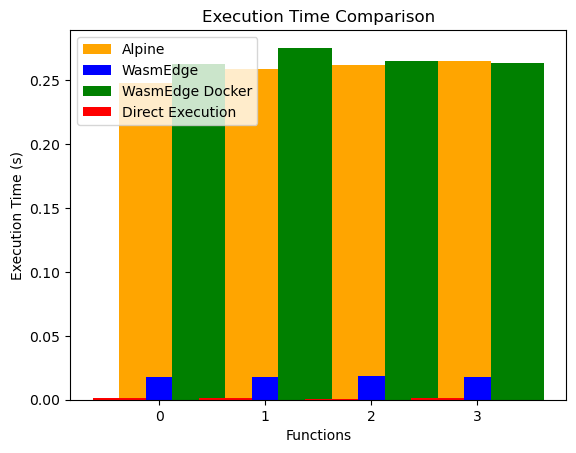

In [11]:
import matplotlib.pyplot as plt

# order cosine, sine, factorial, factors
x = ["cosine", "sine", "factorial", "factors"]
avg_execution_go = [0.003576, 0.003674, 0.003672, 0.003466]
avg_execution_c = [0.002516, 0.002654, 0.002421, 0.002329]
avg_execution_python = [0.015934415, 0.0156487424, 0.014972677100000002, 0.018226345699999997]
avg_execution_rust = [0.0011533710999999999, 0.0010271995, 0.0008657777999999999, 0.0009778237]
alpine_c = [0.271996, 0.271181, 0.265342, 0.258527]  # Reordered to match Function sequence
alpine_go = [0.2737348319, 0.2687481402, 0.263773799, 0.2688014746]
alpine_rust = [0.2478129625, 0.2584235429, 0.2615751981, 0.2651181699]
alpine_python = [0.46355721980000003, 0.46222414, 0.4508116631, 0.45667954480000006]
wasmedge_c = [0.015198, 0.015857, 0.016383, 0.015678]
wasmedge_go = [0.018069, 0.015697, 0.015851, 0.016844]
wasmedge_rust = [0.017654, 0.017529, 0.018615, 0.017685]
wasmedge_python = [0.013142908200000001, 0.014427632, 0.0144465546, 0.016252878300000002]
wasmedge_docker_c = [0.2578949928, 0.2625657081, 0.2688354493, 0.25010743139999997]
wasmedge_docker_go = [0.2702477694, 0.2819520712,  0.2822720291, 0.2761562823]
wasmedge_docker_rust = [0.26268165099999996, 0.27543880939999993, 0.2654306411, 0.2631838084]
wasmedge_docker_python = [0, 0, 0, 0]

y = range(len(x))
bar_width = 0.5

plt.bar([p - bar_width/4 for p in y], alpine_rust, width=bar_width, label="Alpine", color = "orange")
plt.bar([p + bar_width/4 for p in y], wasmedge_rust, width=bar_width, label="WasmEdge", color = "blue")
plt.bar([p + 3*bar_width/4 for p in y], wasmedge_docker_rust, width=bar_width, label="WasmEdge Docker", color = "green")
plt.bar([p - 3*bar_width/4 for p in y], avg_execution_rust, width=bar_width, label="Direct Execution", color = "red")

plt.xlabel("Functions")
plt.ylabel("Execution Time (s)")
plt.title("Execution Time Comparison")
plt.legend()
plt.show()

KeyError: 'slim_creation'

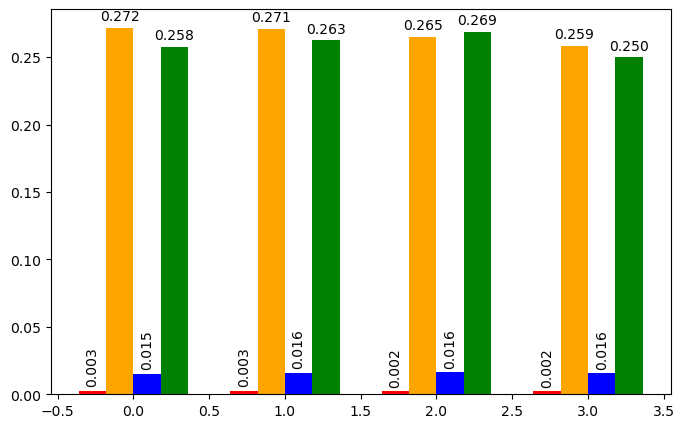

In [1]:
import matplotlib.pyplot as plt

# Functions order
x = ["cosine", "sine", "factorial", "factors"]
y = range(len(x))

# Execution times for different languages
avg_execution_go = [0.003576, 0.003674, 0.003672, 0.003466]
avg_execution_c = [0.002516, 0.002654, 0.002421, 0.002329]
avg_execution_python = [0.015934415, 0.0156487424, 0.0149726771, 0.0182263457]
avg_execution_rust = [0.0011533711, 0.0010271995, 0.0008657778, 0.0009778237]

alpine_c = [0.271996, 0.271181, 0.265342, 0.258527]
alpine_go = [0.2737348319, 0.2687481402, 0.263773799, 0.2688014746]
alpine_rust = [0.2478129625, 0.2584235429, 0.2615751981, 0.2651181699]
alpine_python = [0.4635572198, 0.46222414, 0.4508116631, 0.4566795448]

wasmedge_c = [0.015198, 0.015857, 0.016383, 0.015678]
wasmedge_go = [0.018069, 0.015697, 0.015851, 0.016844]
wasmedge_rust = [0.017654, 0.017529, 0.018615, 0.017685]
wasmedge_python = [0.0131429082, 0.014427632, 0.0144465546, 0.0162528783]

wasmedge_docker_c = [0.2578949928, 0.2625657081, 0.2688354493, 0.2501074314]
wasmedge_docker_go = [0.2702477694, 0.2819520712, 0.2822720291, 0.2761562823]
wasmedge_docker_rust = [0.2626816510, 0.2754388094, 0.2654306411, 0.2631838084]
wasmedge_docker_python = [0, 0, 0, 0]


slim_creation_c = [0.1534729, 0.1560079, 0.1629987, 0.14764170000000001]
alpine_creation_c = [0.16247490000000003, 0.15685849999999996, 0.16390500000000002, 0.1505722]

slim_creation_go = [0.16265999999999997, 0.1738671, 0.17008830000000003, 0.1652733]
alpine_creation_go = [0.16249, 0.1552606, 0.15824670000000002, 0.1616989]

slim_creation_rust = [0.15611550000000002, 0.16593360000000001, 0.15731979999999998, 0.15341580000000002]
alpine_creation_rust = [0.1475192, 0.151222, 0.1539276, 0.150237]

slim_creation_python = [0] * 4
alpine_creation_python = [0] * 4    


# Grouping data for each language
languages = {
    "C": {
        "direct": avg_execution_c,
        "alpine": alpine_c,
        "wasmedge": wasmedge_c,
        "wasmedge_docker": wasmedge_docker_c,
        "slim_creation": slim_creation_c,
        "alpine_creation": alpine_creation_c,
    },
    "Go": {
        "direct": avg_execution_go,
        "alpine": alpine_go,
        "wasmedge": wasmedge_go,
        "wasmedge_docker": wasmedge_docker_go,
        "slim_creation": slim_creation_go,
        "alpine_creation": alpine_creation_go,
    },
    "Python": {
        "direct": avg_execution_python,
        "alpine": alpine_python,
        "wasmedge": wasmedge_python,
        "wasmedge_docker": wasmedge_docker_python,
    },
    "Rust": {
        "direct": avg_execution_rust,
        "alpine": alpine_rust,
        "wasmedge": wasmedge_rust,
        "wasmedge_docker": wasmedge_docker_rust,
        "slim_creation": slim_creation_rust,
        "alpine_creation": alpine_creation_rust,
    },
}

# Colors for the bars
colors = {
    "direct": "red",
    "alpine": "orange",
    "wasmedge": "blue",
    "wasmedge_docker": "green",
}

# Plot for each language
for lang, data in languages.items():
    plt.figure(figsize=(8, 5))
    bar_width = 0.18

    # Centering bars around each function index
    positions = {
        "direct": [-1.5 * bar_width],
        "alpine": [-0.5 * bar_width],
        "wasmedge": [0.5 * bar_width],
        "wasmedge_docker": [1.5 * bar_width],
        "slim_creation": [1.5 * bar_width],
        "alpine_creation": [-0.5 * bar_width],
    }

    for method, values in data.items():
        bars = plt.bar(
            [p + positions[method][0] for p in y],
            values,
            width=bar_width,
            label=method.replace("_", " ").title(),
            color=colors[method],
        )
        if method == "direct" or method == "wasmedge" or (lang == "Python" and method == "wasmedge_docker"):
            plt.bar_label(bars, padding=3, fmt="%.3f", rotation=90)
        else:
            plt.bar_label(bars, padding=3, fmt="%.3f")

    plt.xticks(y, x)
    plt.xlabel("Functions")
    plt.ylabel("Execution Time (s)")
    plt.title(f"Execution Time Comparison for {lang}")
    plt.legend()

    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()


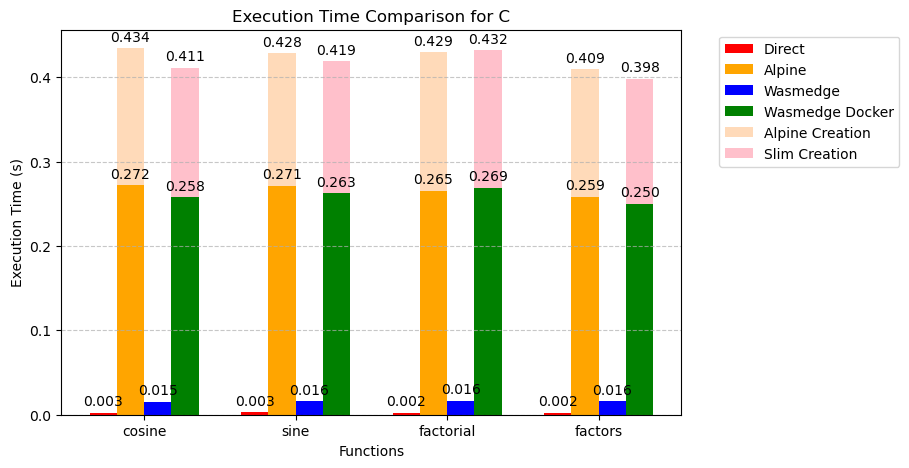

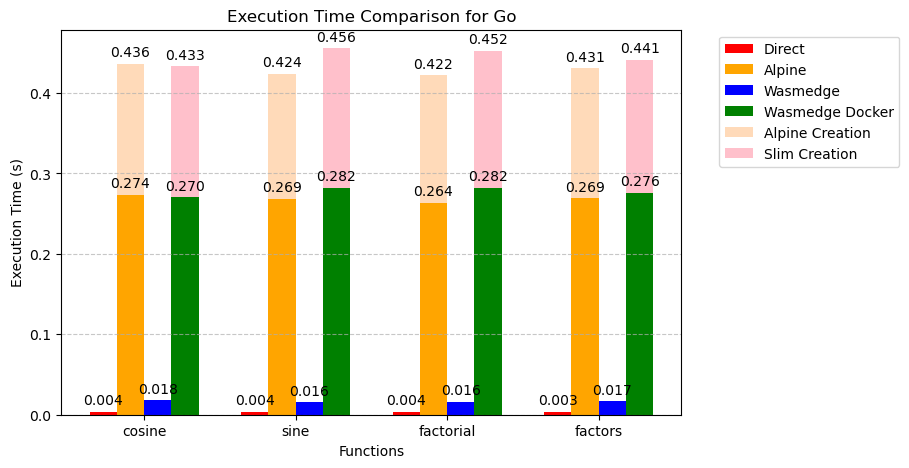

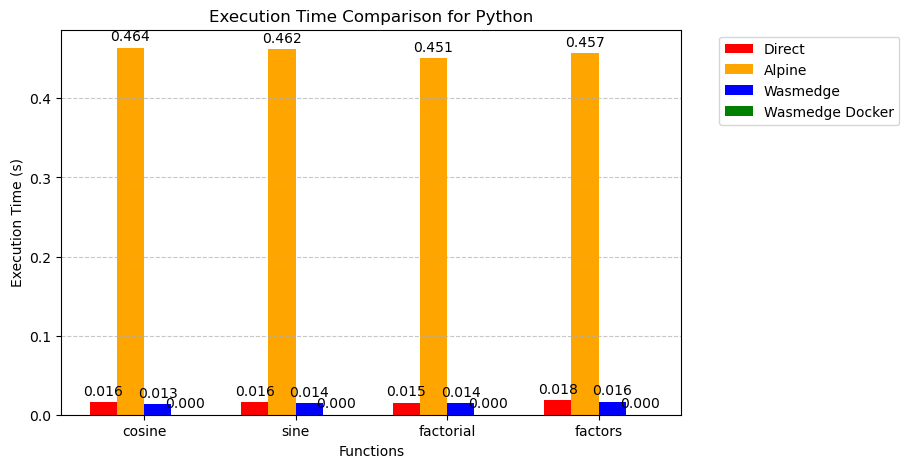

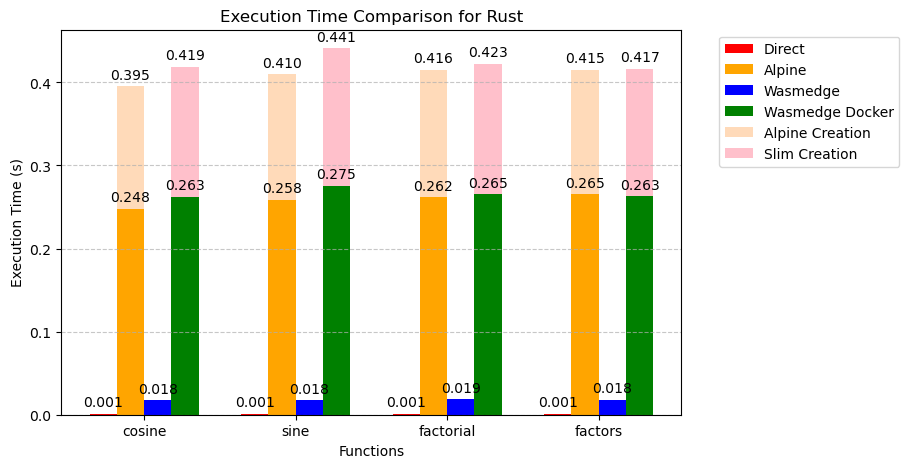

In [15]:
import matplotlib.pyplot as plt

# Functions order
x = ["cosine", "sine", "factorial", "factors"]
y = range(len(x))

# Execution times for different languages
avg_execution_go = [0.003576, 0.003674, 0.003672, 0.003466]
avg_execution_c = [0.002516, 0.002654, 0.002421, 0.002329]
avg_execution_python = [0.015934415, 0.0156487424, 0.0149726771, 0.0182263457]
avg_execution_rust = [0.0011533711, 0.0010271995, 0.0008657778, 0.0009778237]

alpine_c = [0.271996, 0.271181, 0.265342, 0.258527]
alpine_go = [0.2737348319, 0.2687481402, 0.263773799, 0.2688014746]
alpine_rust = [0.2478129625, 0.2584235429, 0.2615751981, 0.2651181699]
alpine_python = [0.4635572198, 0.46222414, 0.4508116631, 0.4566795448]

wasmedge_c = [0.015198, 0.015857, 0.016383, 0.015678]
wasmedge_go = [0.018069, 0.015697, 0.015851, 0.016844]
wasmedge_rust = [0.017654, 0.017529, 0.018615, 0.017685]
wasmedge_python = [0.0131429082, 0.014427632, 0.0144465546, 0.0162528783]

wasmedge_docker_c = [0.2578949928, 0.2625657081, 0.2688354493, 0.2501074314]
wasmedge_docker_go = [0.2702477694, 0.2819520712, 0.2822720291, 0.2761562823]
wasmedge_docker_rust = [0.2626816510, 0.2754388094, 0.2654306411, 0.2631838084]
wasmedge_docker_python = [0, 0, 0, 0]


slim_creation_c = [0.1534729, 0.1560079, 0.1629987, 0.14764170000000001]
alpine_creation_c = [0.16247490000000003, 0.15685849999999996, 0.16390500000000002, 0.1505722]

slim_creation_go = [0.16265999999999997, 0.1738671, 0.17008830000000003, 0.1652733]
alpine_creation_go = [0.16249, 0.1552606, 0.15824670000000002, 0.1616989]

slim_creation_rust = [0.15611550000000002, 0.16593360000000001, 0.15731979999999998, 0.15341580000000002]
alpine_creation_rust = [0.1475192, 0.151222, 0.1539276, 0.150237]

slim_creation_python = [0] * 4
alpine_creation_python = [0] * 4    


# Grouping data for each language
languages = {
    "C": {
        "direct": avg_execution_c,
        "alpine": alpine_c,
        "wasmedge": wasmedge_c,
        "wasmedge_docker": wasmedge_docker_c,
        "slim_creation": slim_creation_c,
        "alpine_creation": alpine_creation_c,
    },
    "Go": {
        "direct": avg_execution_go,
        "alpine": alpine_go,
        "wasmedge": wasmedge_go,
        "wasmedge_docker": wasmedge_docker_go,
        "slim_creation": slim_creation_go,
        "alpine_creation": alpine_creation_go,
    },
    "Python": {
        "direct": avg_execution_python,
        "alpine": alpine_python,
        "wasmedge": wasmedge_python,
        "wasmedge_docker": wasmedge_docker_python,
    },
    "Rust": {
        "direct": avg_execution_rust,
        "alpine": alpine_rust,
        "wasmedge": wasmedge_rust,
        "wasmedge_docker": wasmedge_docker_rust,
        "slim_creation": slim_creation_rust,
        "alpine_creation": alpine_creation_rust,
    },
}

# Colors for the bars
colors = {
    "direct": "red",
    "alpine": "orange",
    "wasmedge": "blue",
    "wasmedge_docker": "green",
}


for lang, data in languages.items():
    plt.figure(figsize=(8, 5))
    bar_width = 0.18

    # Positions centered around each function index
    positions = {
        "direct": -1.5 * bar_width,
        "alpine": -0.5 * bar_width,
        "wasmedge": 0.5 * bar_width,
        "wasmedge_docker": 1.5 * bar_width,
    }

    for method, values in data.items():
        if method in ["slim_creation", "alpine_creation"]:
            # Skip here, we’ll add them stacked later
            continue

        bars = plt.bar(
            [p + positions[method] for p in y],
            values,
            width=bar_width,
            label=method.replace("_", " ").title(),
            color=colors[method],
        )
        plt.bar_label(bars, padding=3, fmt="%.3f")

    # Now stack creation times
    if "alpine_creation" in data:
        bars = plt.bar(
            [p + positions["alpine"] for p in y],
            data["alpine_creation"],
            width=bar_width,
            bottom=data["alpine"],  # stack on top of alpine bar
            label="Alpine Creation",
            color="peachpuff",
        )

        plt.bar_label(bars, padding=3, fmt="%.3f")
    if "slim_creation" in data:
        bars = plt.bar(
            [p + positions["wasmedge_docker"] for p in y],
            data["slim_creation"],
            width=bar_width,
            bottom=data["wasmedge_docker"],  # stack on top of wasmedge_docker bar
            label="Slim Creation",
            color="pink",
        )
        plt.bar_label(bars, padding=3, fmt="%.3f")

    plt.xticks(y, x)
    plt.xlabel("Functions")
    plt.ylabel("Execution Time (s)")
    plt.title(f"Execution Time Comparison for {lang}")
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")


    plt.grid(axis="y", linestyle="--", alpha=0.7)
    # plt.tight_layout()
    plt.show()


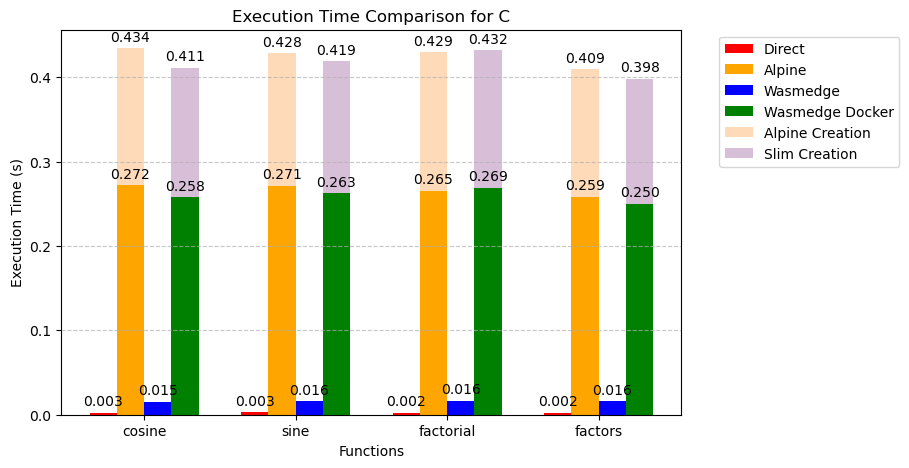

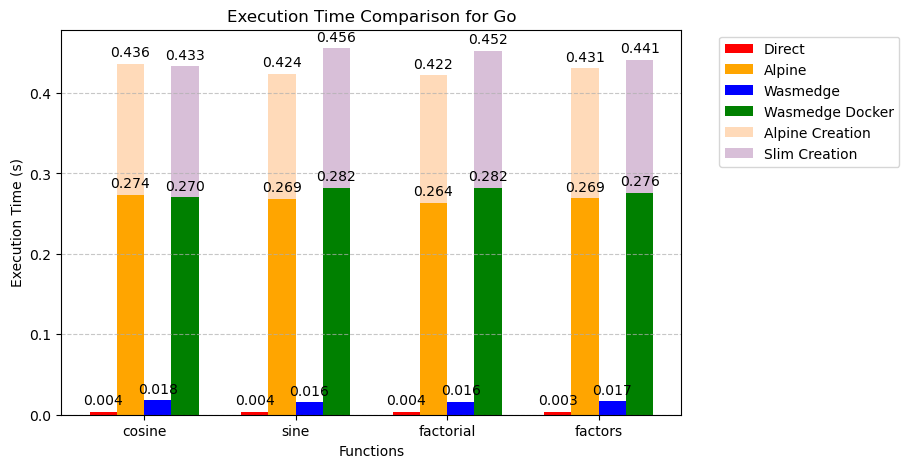

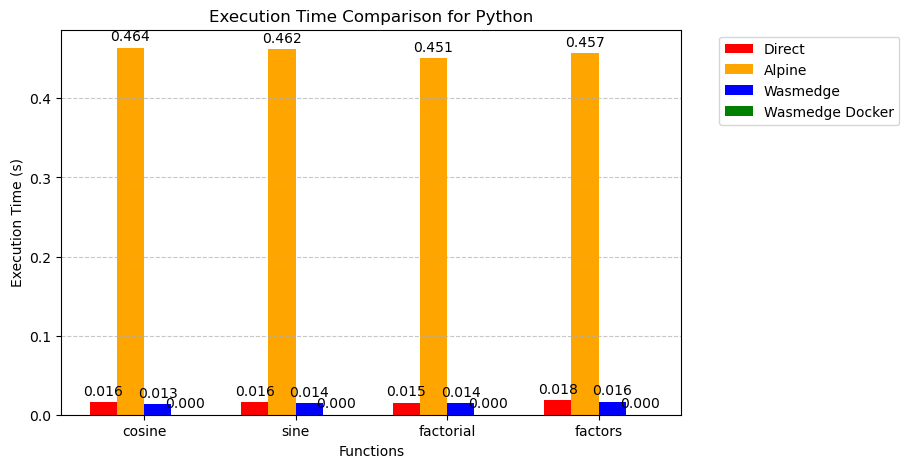

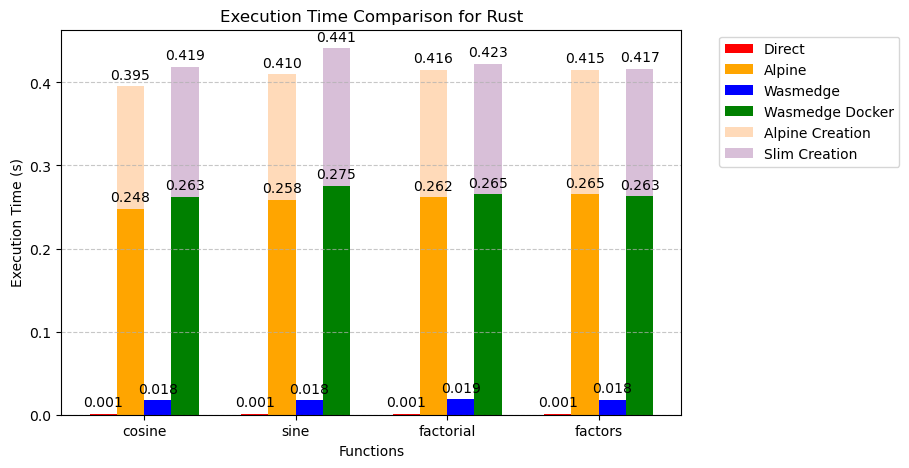

In [18]:
import matplotlib.pyplot as plt

# Functions order
x = ["cosine", "sine", "factorial", "factors"]
y = range(len(x))

# Execution times for different languages
avg_execution_go = [0.003576, 0.003674, 0.003672, 0.003466]
avg_execution_c = [0.002516, 0.002654, 0.002421, 0.002329]
avg_execution_python = [0.015934415, 0.0156487424, 0.0149726771, 0.0182263457]
avg_execution_rust = [0.0011533711, 0.0010271995, 0.0008657778, 0.0009778237]

alpine_c = [0.271996, 0.271181, 0.265342, 0.258527]
alpine_go = [0.2737348319, 0.2687481402, 0.263773799, 0.2688014746]
alpine_rust = [0.2478129625, 0.2584235429, 0.2615751981, 0.2651181699]
alpine_python = [0.4635572198, 0.46222414, 0.4508116631, 0.4566795448]

wasmedge_c = [0.015198, 0.015857, 0.016383, 0.015678]
wasmedge_go = [0.018069, 0.015697, 0.015851, 0.016844]
wasmedge_rust = [0.017654, 0.017529, 0.018615, 0.017685]
wasmedge_python = [0.0131429082, 0.014427632, 0.0144465546, 0.0162528783]

wasmedge_docker_c = [0.2578949928, 0.2625657081, 0.2688354493, 0.2501074314]
wasmedge_docker_go = [0.2702477694, 0.2819520712, 0.2822720291, 0.2761562823]
wasmedge_docker_rust = [0.2626816510, 0.2754388094, 0.2654306411, 0.2631838084]
wasmedge_docker_python = [0, 0, 0, 0]


slim_creation_c = [0.1534729, 0.1560079, 0.1629987, 0.14764170000000001]
alpine_creation_c = [0.16247490000000003, 0.15685849999999996, 0.16390500000000002, 0.1505722]

slim_creation_go = [0.16265999999999997, 0.1738671, 0.17008830000000003, 0.1652733]
alpine_creation_go = [0.16249, 0.1552606, 0.15824670000000002, 0.1616989]

slim_creation_rust = [0.15611550000000002, 0.16593360000000001, 0.15731979999999998, 0.15341580000000002]
alpine_creation_rust = [0.1475192, 0.151222, 0.1539276, 0.150237]

slim_creation_python = [0] * 4
alpine_creation_python = [0] * 4    


# Grouping data for each language
languages = {
    "C": {
        "direct": avg_execution_c,
        "alpine": alpine_c,
        "wasmedge": wasmedge_c,
        "wasmedge_docker": wasmedge_docker_c,
        "slim_creation": slim_creation_c,
        "alpine_creation": alpine_creation_c,
    },
    "Go": {
        "direct": avg_execution_go,
        "alpine": alpine_go,
        "wasmedge": wasmedge_go,
        "wasmedge_docker": wasmedge_docker_go,
        "slim_creation": slim_creation_go,
        "alpine_creation": alpine_creation_go,
    },
    "Python": {
        "direct": avg_execution_python,
        "alpine": alpine_python,
        "wasmedge": wasmedge_python,
        "wasmedge_docker": wasmedge_docker_python,
    },
    "Rust": {
        "direct": avg_execution_rust,
        "alpine": alpine_rust,
        "wasmedge": wasmedge_rust,
        "wasmedge_docker": wasmedge_docker_rust,
        "slim_creation": slim_creation_rust,
        "alpine_creation": alpine_creation_rust,
    },
}

# Colors for the bars
colors = {
    "direct": "red",
    "alpine": "orange",
    "wasmedge": "blue",
    "wasmedge_docker": "green",
}

for lang, data in languages.items():
    plt.figure(figsize=(8, 5))
    bar_width = 0.18

    positions = {
        "direct": -1.5 * bar_width,
        "alpine": -0.5 * bar_width,
        "wasmedge": 0.5 * bar_width,
        "wasmedge_docker": 1.5 * bar_width,
    }

    for method, values in data.items():
        if method in ["slim_creation", "alpine_creation"]:
            continue

        bars = plt.bar(
            [p + positions[method] for p in y],
            values,
            width=bar_width,
            label=method.replace("_", " ").title(),
            color=colors[method],
        )
        plt.bar_label(bars, padding=3, fmt="%.3f")

    # Add alpine creation stacked
    if "alpine_creation" in data:
        bars = plt.bar(
            [p + positions["alpine"] for p in y],
            data["alpine_creation"],
            width=bar_width,
            bottom=data["alpine"],
            label="Alpine Creation",
            color="peachpuff",
        )
        plt.bar_label(bars, padding=3, fmt="%.3f")

        # Annotate difference (execution - creation) vertically
        # for i, (exec_val, create_val) in enumerate(zip(data["alpine"], data["alpine_creation"])):
        #     diff = exec_val - create_val
        #     if diff > 0:
        #         plt.text(
        #             i + positions["alpine"],
        #             create_val + diff / 2,   # midpoint of the gap
        #             f"{diff:.3f}",
        #             ha="center", va="center",
        #             rotation=90, fontsize=8, color="black"
        #         )

    # Add slim creation stacked
    if "slim_creation" in data:
        bars = plt.bar(
            [p + positions["wasmedge_docker"] for p in y],
            data["slim_creation"],
            width=bar_width,
            bottom=data["wasmedge_docker"],
            label="Slim Creation",
            color="thistle",
        )
        plt.bar_label(bars, padding=3, fmt="%.3f")

        # for i, (exec_val, create_val) in enumerate(zip(data["wasmedge_docker"], data["slim_creation"])):
        #     diff = exec_val - create_val
        #     if diff > 0:
        #         plt.text(
        #             i + positions["wasmedge_docker"],
        #             create_val + diff / 2,
        #             f"{diff:.3f}",
        #             ha="center", va="center",
        #             rotation=90, fontsize=8, color="black"
        #         )

    plt.xticks(y, x)
    plt.xlabel("Functions")
    plt.ylabel("Execution Time (s)")
    plt.title(f"Execution Time Comparison for {lang}")
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
